## Step by step generation of Advanced Companies Code

In [ ]:
# You are an expert Python developer who builds readable code. Together we will work on an application that has a database to store information, code to retrieve data from the database, and analytics that will run on the retrieved data.

# First, let's create the database, which has a table for companies. The table will have three columns, the first is an id, the second the ticker for the company, the third is the name of the company. Create this, and synthesize data for 10 companies, adding that to the database.

# Now add another table called 'TimeSeries' that has four columns, an id for the row, the id for one of the companies, a value, and a date. Populate this with about 100 values per company, and have the dates be successive.

# Now can you query the database and list all tables with 5 records each

# Now create code that when given a company ticker or an ID that it will extract the data for that company, and the time series data and load it into an company object. This object should have fields and functions for calculating and storing high_bollinger, low_bollinger and moving_average and all three are same data type as the time series, and a grade field which is a string. For the bollinger bands and moving average create config parameters which can be updated to modify the bands in charts.

# Now can you write code using Seabourne or Matplotlib to plot the time series data for a company, and use the already calculated bollinger data to overlay the high bollinger, low bollinger, and moving average on the same plot?

# Can you refactor the code above to move print_company_data and plot_company_data functions into the Company class as methods?
# Is it a good idea to move get_company_data function into the Company class as a static method? If yes, refactor the code to do so.

In [1]:
# You are an expert Python developer who builds readable code. Together we will work on an application that has a database to store information, code to retrieve data from the database, and analytics that will run on the retrieved data.

# First, let's create the database, which has a table for companies. The table will have three columns, the first is an id, the second the ticker for the company, the third is the name of the company. Create this, and synthesize data for 10 companies, adding that to the database.

import sqlite3
import random
from datetime import datetime, timedelta

# Create a connection to the database
conn = sqlite3.connect("advanced_companies.db")
cursor = conn.cursor()

# Create the companies table
cursor.execute(
    """
CREATE TABLE companies (
    id INTEGER PRIMARY KEY,
    ticker TEXT NOT NULL,
    name TEXT NOT NULL
)
"""
)

# Insert data into the companies table
companies = [
    (1, "AAPL", "Apple Inc."),
    (2, "MSFT", "Microsoft Corporation"),
    (3, "GOOGL", "Alphabet Inc."),
    (4, "AMZN", "Amazon.com Inc."),
    (5, "FB", "Meta Platforms Inc."),
    (6, "TSLA", "Tesla Inc."),
    (7, "BRK.A", "Berkshire Hathaway Inc."),
    (8, "V", "Visa Inc."),
    (9, "JNJ", "Johnson & Johnson"),
    (10, "WMT", "Walmart Inc."),
]

cursor.executemany("INSERT INTO companies VALUES (?, ?, ?)", companies)
# Commit the transaction
conn.commit()


# Now add another table called 'TimeSeries' that has four columns, an id for the row, the id for one of the companies, a value, and a date. Populate this with about 100 values per company, and have the dates be successive.

# Create the TimeSeries table
cursor.execute(
    """
CREATE TABLE TimeSeries (
    id INTEGER PRIMARY KEY,
    company_id INTEGER,
    value REAL,
    date TEXT,
    FOREIGN KEY (company_id) REFERENCES companies (id)
)
"""
)

# Insert data into the TimeSeries table
start_date = datetime(2020, 1, 1)
time_series_data = []

for company in companies:
    company_id = company[0]
    for i in range(100):
        value = round(random.uniform(100, 500), 2)
        date = (start_date + timedelta(days=i)).strftime("%Y-%m-%d")
        time_series_data.append((None, company_id, value, date))

cursor.executemany("INSERT INTO TimeSeries VALUES (?, ?, ?, ?)", time_series_data)

# Commit the transaction and close the connection
conn.commit()
conn.close()

In [2]:
# Now can you query the database and list all tables with 5 records each

# Create a connection to the database
conn = sqlite3.connect("advanced_companies.db")
cursor = conn.cursor()

# Query to list all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Fetch and print 5 records from each table
for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;")
    records = cursor.fetchall()
    for record in records:
        print(record)
    print("\n")

Table: companies
(1, 'AAPL', 'Apple Inc.')
(2, 'MSFT', 'Microsoft Corporation')
(3, 'GOOGL', 'Alphabet Inc.')
(4, 'AMZN', 'Amazon.com Inc.')
(5, 'FB', 'Meta Platforms Inc.')


Table: TimeSeries
(1, 1, 412.29, '2020-01-01')
(2, 1, 285.48, '2020-01-02')
(3, 1, 127.67, '2020-01-03')
(4, 1, 377.86, '2020-01-04')
(5, 1, 292.3, '2020-01-05')




In [3]:
# Can you rewrite the code above to use a Singleton pattern for the database connection? Ensure that the get_connection is a static method.


class DatabaseConnection:
    _instance = None

    def __new__(cls):
        if cls._instance is None:
            cls._instance = super(DatabaseConnection, cls).__new__(cls)
            cls._instance._connection = sqlite3.connect("advanced_companies.db")
            cls._instance._cursor = cls._instance._connection.cursor()
        return cls._instance

    @staticmethod
    def get_connection():
        return DatabaseConnection()._connection

    @staticmethod
    def get_cursor():
        return DatabaseConnection()._cursor


# Use the singleton pattern to get the connection and cursor
conn = DatabaseConnection.get_connection()
cursor = DatabaseConnection.get_cursor()

# Query to list all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Fetch and print 5 records from each table
for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 5;")
    records = cursor.fetchall()
    for record in records:
        print(record)
    print("\n")

Table: companies
(1, 'AAPL', 'Apple Inc.')
(2, 'MSFT', 'Microsoft Corporation')
(3, 'GOOGL', 'Alphabet Inc.')
(4, 'AMZN', 'Amazon.com Inc.')
(5, 'FB', 'Meta Platforms Inc.')


Table: TimeSeries
(1, 1, 412.29, '2020-01-01')
(2, 1, 285.48, '2020-01-02')
(3, 1, 127.67, '2020-01-03')
(4, 1, 377.86, '2020-01-04')
(5, 1, 292.3, '2020-01-05')




In [ ]:
# Can you refactor the code above to move print_company_data and plot_company_data functions into the Company class as methods?
# Is it a good idea to move get_company_data function into the Company class as a static method? If yes, refactor the code to do so.
import pandas as pd
import matplotlib.pyplot as plt

class Company:
    def __init__(self, company_id, ticker, name):
        self.company_id = company_id
        self.ticker = ticker
        self.name = name
        self.time_series = self._get_time_series()
        self.high_bollinger = None
        self.low_bollinger = None
        self.moving_average = None
        self.grade = None

    def _get_time_series(self):
        cursor.execute(
            "SELECT value, date FROM TimeSeries WHERE company_id = ?",
            (self.company_id,),
        )
        data = cursor.fetchall()
        df = pd.DataFrame(data, columns=["value", "date"])
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)
        return df

    def calculate_moving_average(self, window=20):
        self.moving_average = self.time_series["value"].rolling(window=window).mean()

    def calculate_bollinger_bands(self, window=20, num_std_dev=2):
        rolling_mean = self.time_series["value"].rolling(window=window).mean()
        rolling_std = self.time_series["value"].rolling(window=window).std()
        self.high_bollinger = rolling_mean + (rolling_std * num_std_dev)
        self.low_bollinger = rolling_mean - (rolling_std * num_std_dev)

    def set_grade(self, grade):
        self.grade = grade

    def print_data(self):
        print(self.moving_average)
        print(self.high_bollinger)
        print(self.low_bollinger)
        print(self.grade)

    def plot_data(self):
        plt.figure(figsize=(14, 7))
        plt.plot(self.time_series.index, self.time_series["value"], label="Time Series")
        if self.moving_average is not None:
            plt.plot(
                self.time_series.index,
                self.moving_average,
                label="Moving Average",
                linestyle="--",
            )
        if self.high_bollinger is not None and self.low_bollinger is not None:
            plt.plot(
                self.time_series.index,
                self.high_bollinger,
                label="High Bollinger Band",
                linestyle="--",
            )
            plt.plot(
                self.time_series.index,
                self.low_bollinger,
                label="Low Bollinger Band",
                linestyle="--",
            )
        plt.title(f"Time Series Data for {self.name}")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend()
        plt.show()

    @staticmethod
    def get_company_data(identifier):
        if isinstance(identifier, int):
            cursor.execute("SELECT * FROM companies WHERE id = ?", (identifier,))
        else:
            cursor.execute("SELECT * FROM companies WHERE ticker = ?", (identifier,))
        company_data = cursor.fetchone()
        if company_data:
            company = Company(company_data[0], company_data[1], company_data[2])
            return company
        else:
            return None

date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
                ...   
2020-04-05    294.1025
2020-04-06    291.9220
2020-04-07    292.3765
2020-04-08    298.2545
2020-04-09    281.9575
Name: value, Length: 100, dtype: float64
date
2020-01-01           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-04           NaN
2020-01-05           NaN
                 ...    
2020-04-05    520.710500
2020-04-06    525.173808
2020-04-07    526.223070
2020-04-08    525.489622
2020-04-09    512.426693
Name: value, Length: 100, dtype: float64
date
2020-01-01          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-04          NaN
2020-01-05          NaN
                ...    
2020-04-05    67.494500
2020-04-06    58.670192
2020-04-07    58.529930
2020-04-08    71.019378
2020-04-09    51.488307
Name: value, Length: 100, dtype: float64
A


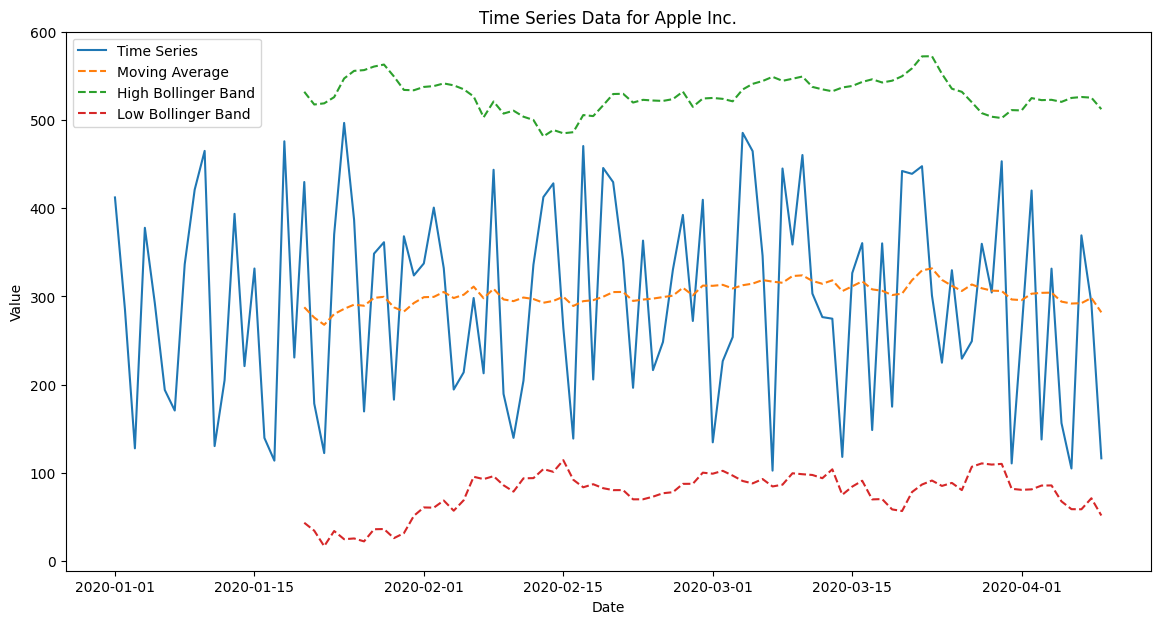

In [5]:
# Example usage:
company = Company.get_company_data("AAPL")
if company:
    company.calculate_moving_average()
    company.calculate_bollinger_bands()
    company.set_grade("A")
    company.print_data()
    company.plot_data()

date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
                ...   
2020-04-05    327.1795
2020-04-06    339.3195
2020-04-07    336.4965
2020-04-08    335.3335
2020-04-09    333.8660
Name: value, Length: 100, dtype: float64
date
2020-01-01           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-04           NaN
2020-01-05           NaN
                 ...    
2020-04-05    594.014541
2020-04-06    594.137375
2020-04-07    594.454753
2020-04-08    596.927867
2020-04-09    592.693367
Name: value, Length: 100, dtype: float64
date
2020-01-01          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-04          NaN
2020-01-05          NaN
                ...    
2020-04-05    60.344459
2020-04-06    84.501625
2020-04-07    78.538247
2020-04-08    73.739133
2020-04-09    75.038633
Name: value, Length: 100, dtype: float64
A


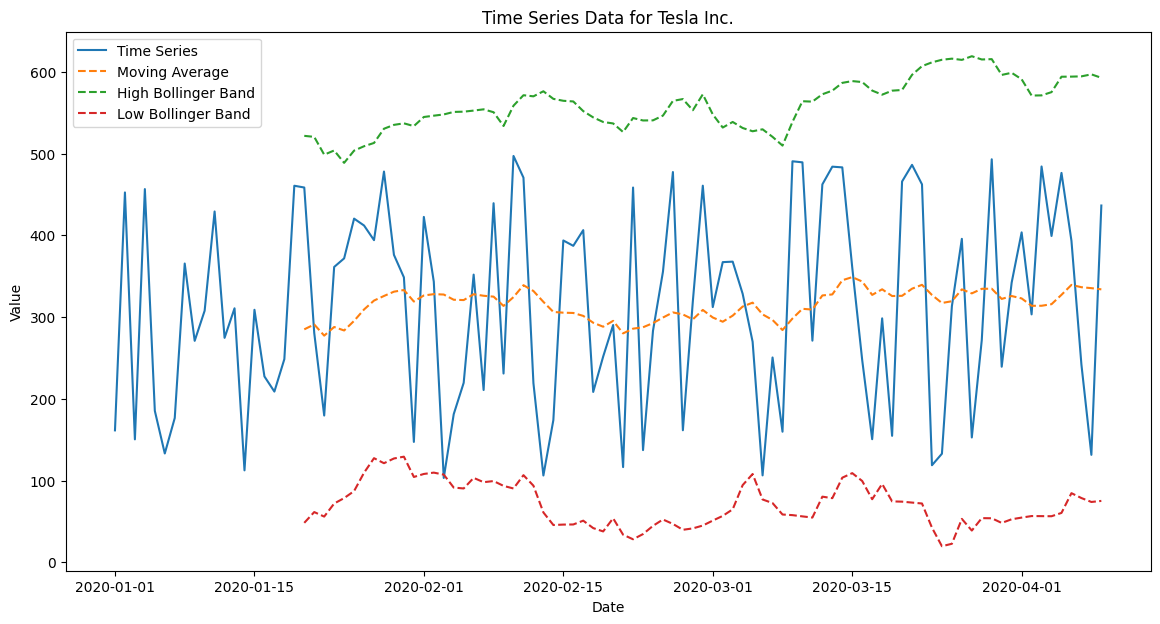

In [6]:
# Example usage:
company = Company.get_company_data("TSLA")
if company:
    company.calculate_moving_average()
    company.calculate_bollinger_bands()
    company.set_grade("A")
    company.print_data()
    company.plot_data()